# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [3]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

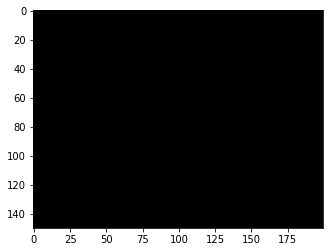

In [4]:
#Your solution
ii = np.zeros((150, 200), dtype=np.uint8)
print(ii)

plt.imshow(ii, cmap='gray')
plt.show

How many values can each pixel have in this case? 

In [5]:
#Your solution

#256 values

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

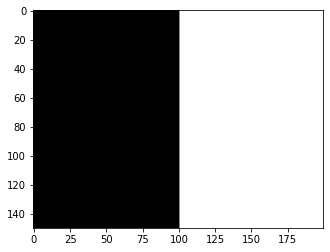

In [6]:
#Your solution

ii[:, 0:(int)(ii.shape[1]/2)] = 0
plt.imshow(ii, cmap='gray')

ii[:, (int)((ii.shape[1]/2)+1):] = 255
plt.imshow(ii, cmap='gray')
plt.show()

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [7]:
#Your solution
from skimage.io import imsave, imread

ii_name = "black_n_white.png"
imsave(ii_name, ii)

b) Load the saved image and visualize it:

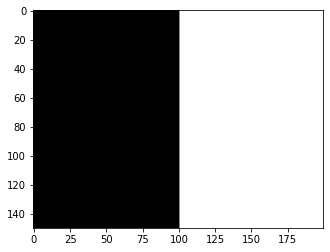

In [8]:
#Your solution
img = io.imread(ii_name)
plt.imshow(img, cmap='gray') #Visualizing a figure with the image
plt.show() 

### 1.3 Color image manipulation

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

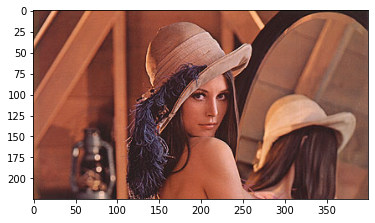

(225, 400, 3)
270000
uint8


In [9]:
#Your solution
img = io.imread("images/images/lenna.jpg")
plt.imshow(img) #Visualizing a figure with the image
plt.show() 
print(img.shape)
print(img.size)
print(img.dtype)

b) Convert the previous image to grayscale, visualize and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

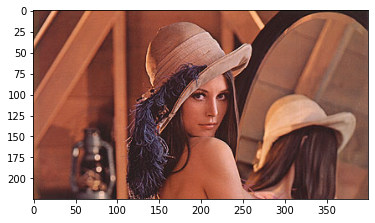

shape:  (225, 400, 3)
dtype:  uint8
max value:  255
min value:  0


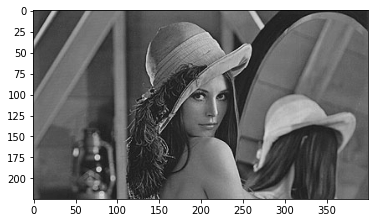

shape:  (225, 400)
dtype:  uint8
max value:  252
min value:  0


In [10]:
#Your solution
from skimage.color import rgb2gray
from skimage import img_as_ubyte

plt.imshow(img)
plt.show()
print('shape: ', img.shape)
print("dtype: ", img.dtype)
print('max value: ', img.max())
print('min value: ', img.min())

img_gray = rgb2gray(img)
img_gray = img_as_ubyte(img_gray)
plt.imshow(img_gray, cmap='gray')
plt.show()
print('shape: ', img_gray.shape)
print("dtype: ", img_gray.dtype)
print('max value: ', img_gray.max())
print('min value: ', img_gray.min())

imsave('lenna_gray.bmp', img_gray)

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

[False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

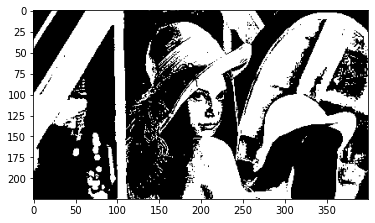

In [11]:
#Your solution
from skimage import img_as_ubyte
"""
img_bool = img_as_ubyte(img_gray).copy()
#img_bool=img.copy()
less_than_100 = img_bool <= 100
more_than_100 = img_bool > 100
img_bool[less_than_100] = 0
img_bool[more_than_100] = 1

print(img_bool[10])
plt.imshow(img_bool, cmap='gray')
plt.show()"""

image_binary = img_gray > 100
print(image_binary[10])
plt.imshow(image_binary.astype(np.float), cmap='gray')
plt.show()


d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

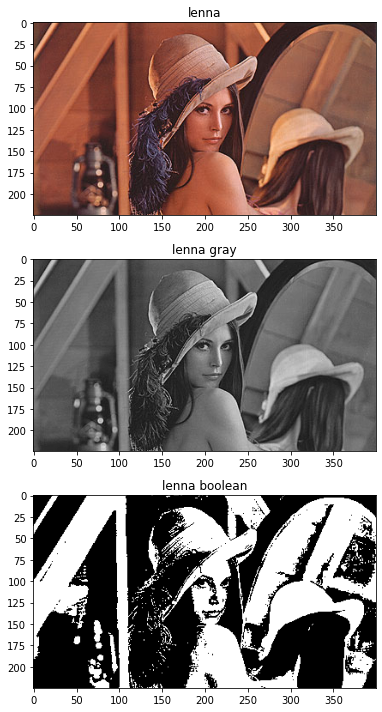

In [86]:
#Your solution
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("lenna")

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("lenna gray")

ax[2].imshow(image_binary, cmap='gray')
ax[2].set_title("lenna boolean")

plt.tight_layout()
plt.show()

### 1.4 Images manipulation

a) Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

(225, 400, 3)
(270, 445, 3)
0.0 255.0


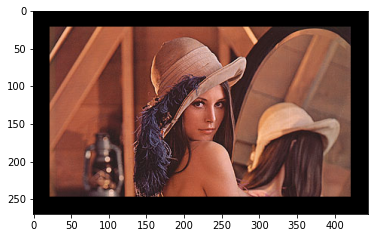

In [25]:
#Your solution
print(img.shape)
shape = img.shape

frame=np.zeros(((int)((12/10)*shape[0]),(int)((2/10)*shape[0] + + shape[1]), 3))

print(frame.shape)
frame[((int)((1/10)*shape[0])):shape[0]+((int)((1/10)*shape[0])), (int)((1/10)*shape[0]):(int)((1/10)*shape[0]+shape[1])] = img[:,:]
print(frame.min(), frame.max())
plt.imshow(frame.astype(np.uint8))
plt.show()

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

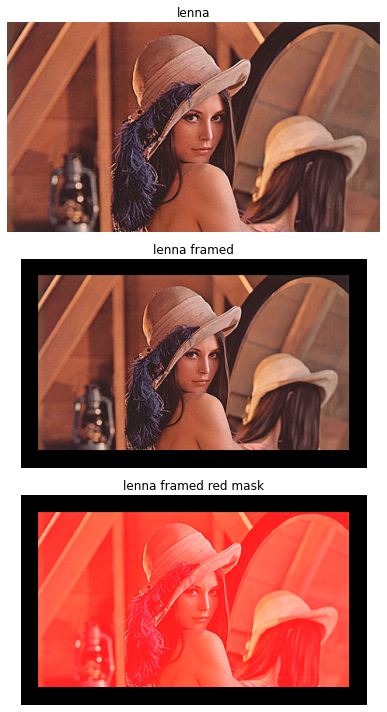

In [29]:
#Your solution

#cond = (frame==0)
#frame[cond] = (255, 0, 0)
frame2 = frame.copy()
frame2[((int)((1/10)*shape[0])):shape[0]+((int)((1/10)*shape[0])), (int)((1/10)*shape[0]):(int)((1/10)*shape[0]+shape[1]), 0] = 255

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("lenna")
ax[0].axis("off")

ax[1].imshow(frame.astype(np.uint8))
ax[1].set_title("lenna framed")
ax[1].axis("off")

ax[2].imshow(frame2.astype(np.uint8))
ax[2].set_title("lenna framed red mask")
ax[2].axis("off")

plt.tight_layout()
plt.show()

### 1.5 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

63 193


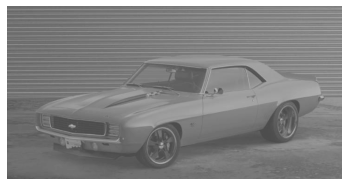

In [32]:
#Your solution
car = io.imread("images/images/car_lowContrast.jpg")
print(car.min(), car.max())
plt.axis("off")
plt.imshow(car, vmin=0, vmax=255, cmap='gray') #Visualizing a figure with the image
plt.show() 

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

0 130


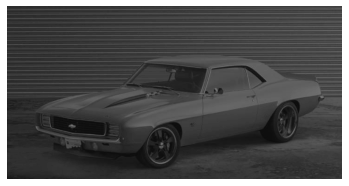

In [31]:
#Your solution
dark_image = car - 63
print(dark_image.min(), dark_image.max())
plt.axis("off")
plt.imshow(dark_image, vmin=0, vmax=255, cmap='gray') #Visualizing a figure with the image
plt.show() 

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

125 255


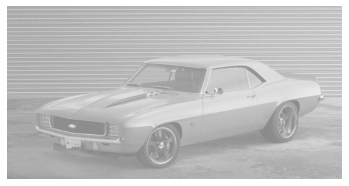

In [33]:
#Your solution
bright_im = car + (255 - 193)
print(bright_im.min(), bright_im.max())
plt.axis("off")
plt.imshow(bright_im, vmin=0, vmax=255, cmap='gray') #Visualizing a figure with the image
plt.show() 

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

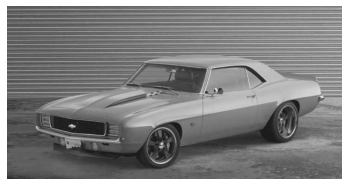

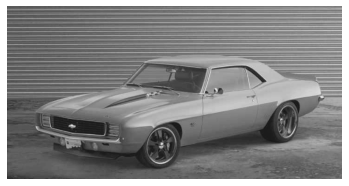

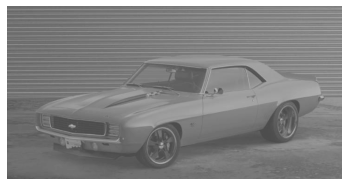

In [79]:
#Your solution
from skimage import exposure

#1rst method:
contrast = (car - car.min())*1/(car.max() - car.min())
plt.axis("off")
plt.imshow(contrast, cmap='gray') #Visualizing a figure with the image
plt.show() 

#2cond method:
p2, p98 = np.percentile(img, (2, 98))
contrast_car = exposure.rescale_intensity(car, in_range=(p2, p98))
plt.axis("off")
plt.imshow(contrast_car, cmap='gray') #Visualizing a figure with the image
plt.show() 

plt.axis("off")
plt.imshow(car, vmin=0, vmax=255, cmap='gray') #Visualizing a figure with the image
plt.show() 

e) Visualize the 5 images in the same figure, each one with its corresponding title.

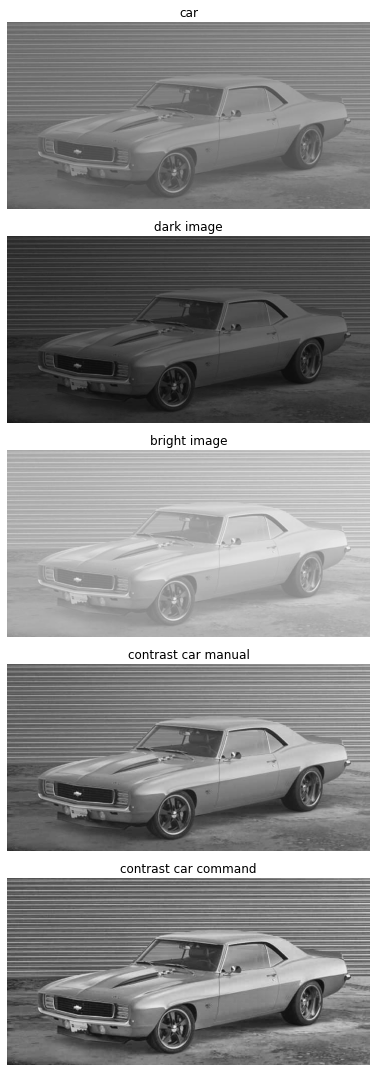

In [35]:
#Your solution
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(car, vmin=0, vmax=255, cmap='gray')
ax[0].set_title("car")
ax[0].axis('off')

ax[1].imshow(dark_image, vmin=0, vmax=255, cmap='gray')
ax[1].set_title("dark image")
ax[1].axis('off')

ax[2].imshow(bright_im, vmin=0, vmax=255, cmap='gray')
ax[2].set_title("bright image")
ax[2].axis('off')

ax[3].imshow(contrast, cmap='gray')
ax[3].set_title("contrast car manual")
ax[3].axis('off')

ax[4].imshow(contrast_car, cmap='gray')
ax[4].set_title("contrast car command")
ax[4].axis('off')

plt.tight_layout()
plt.show()

### 1.6 Masks and logical image manipulation

Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

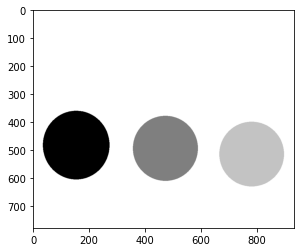

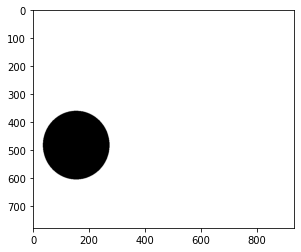

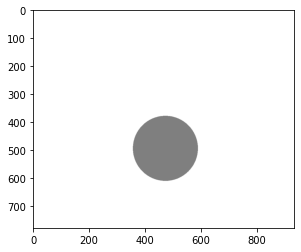

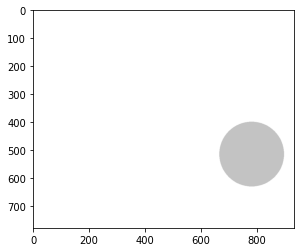

In [62]:
#Your solution
circles = io.imread("images/images/circles.bmp")
plt.imshow(circles, vmin=0, vmax=1) #Visualizing a figure with the image
plt.show() 

#separate the circles
black_circle = circles[300:700, :300]
grey_circle = circles[300:700, 300:600]
white_circle = circles[300:700, 600:]

#create the frame
frame = np.zeros(circles.shape)
frame = frame.astype(np.uint8)
frame.shape
frame[:] = 255

#create the three images
frame_black = frame.copy()
frame_grey = frame.copy()
frame_white = frame.copy()

frame_black[300:700, :300] = black_circle
plt.imshow(frame_black, vmin=0, vmax=1) #Visualizing a figure with the image
plt.show() 

frame_grey[300:700, 300:600] = grey_circle
plt.imshow(frame_grey, vmin=0, vmax=1) #Visualizing a figure with the image
plt.show() 

frame_white[300:700, 600:] = white_circle
plt.imshow(frame_white, vmin=0, vmax=1) #Visualizing a figure with the image
plt.show() 

### 1.7 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/images_notebook/ex17a.png">

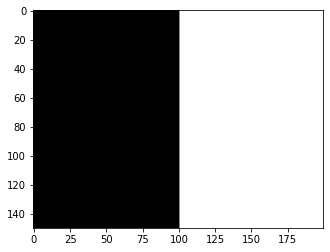

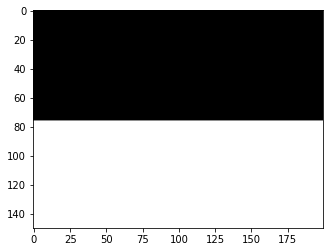

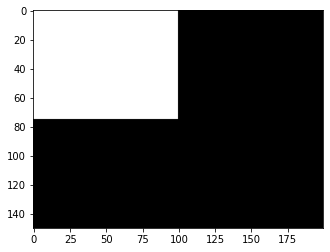

In [71]:
#Your solution

#first picture i):
i = np.zeros((150, 200), dtype=np.uint8)

i[:, (int)((i.shape[1]/2)+1):] = 255
plt.imshow(i, cmap='gray')
plt.show()

#second picture ii):
ii = np.zeros((150, 200), dtype=np.uint8)

ii[(int)((ii.shape[0]/2)+1):, :] = 255
plt.imshow(ii, cmap='gray')
plt.show()

#third picture iii):
iii = np.zeros((150, 200), dtype=np.uint8)

iii[:(int)(iii.shape[0]/2), 0:(int)(i.shape[1]/2)] = 255

plt.imshow(iii, cmap='gray')
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/images_notebook/ex17b.png'>

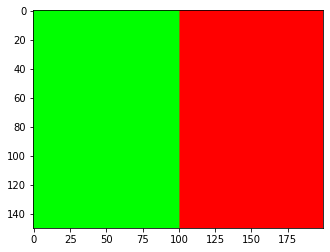

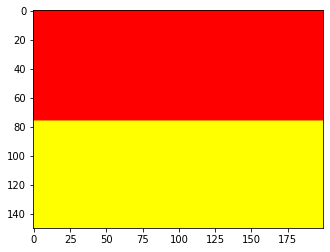

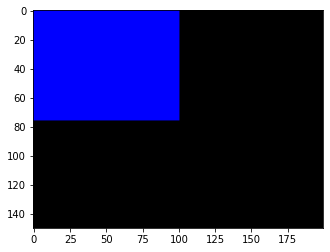

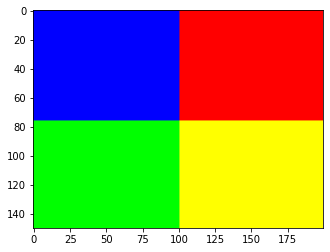

In [78]:
#Your solution
#i =np.zeros((150, 200, 3), dtype=np.uint8)
i[:, 0:(int)(i.shape[1]/2)+1, 1] = 255
i[:, (int)((i.shape[1]/2))+1:, 0] = 255
plt.imshow(i)

plt.imshow(i)
plt.show()

#second picture ii):
#ii = np.zeros((150, 200, 3), dtype=np.uint8)

ii[0:(int)(ii.shape[0]/2)+1, :, 0] = 255
plt.imshow(ii)

ii[(int)((ii.shape[0]/2))+1:, :,0] = 255
ii[(int)((ii.shape[0]/2))+1:, :,1] = 255
plt.imshow(ii)
plt.show()

#third picture iii):
#iii = np.zeros((150, 200, 3), dtype=np.uint8)

iii[:(int)(150/2)+1, 0:(int)(i.shape[1]/2)+1, 2] = 255
plt.imshow(iii)

iii[(int)(150/2)+1:, 0:(int)(i.shape[1]/2)+1] = 0
plt.imshow(iii)

iii[:, (int)((i.shape[1]/2)+1):] = 0
plt.imshow(iii)
plt.show()

#result
result = np.zeros((150, 200, 3), dtype=np.uint8)
result[:(int)(result.shape[0]/2)+1, 0:(int)(i.shape[1]/2)+1, 2] = iii[:(int)(result.shape[0]/2)+1, 0:(int)(i.shape[1]/2)+1, 2]#blue
result[(int)(result.shape[0]/2):, 0:(int)(i.shape[1]/2)+1, 1] = ii[(int)(result.shape[0]/2):, 0:(int)(i.shape[1]/2)+1, 1]#green
result[:(int)(result.shape[0]/2)+1, (int)((i.shape[1]/2))+1:, 0] = i[:(int)(result.shape[0]/2)+1, (int)((i.shape[1]/2))+1:, 0]#red
result[(int)((ii.shape[0]/2))+1:, (int)((i.shape[1]/2))+1:,0] = ii[(int)((ii.shape[0]/2))+1:, (int)((i.shape[1]/2))+1:,0]#yellow
result[(int)((ii.shape[0]/2))+1:, (int)((i.shape[1]/2))+1:,1] = ii[(int)((ii.shape[0]/2))+1:, (int)((i.shape[1]/2))+1:,1]#yellow

plt.imshow(result)
plt.show()

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/images_notebook/ex17c.png">

<img src="images_notebook/images_notebook/ex17c2.png">

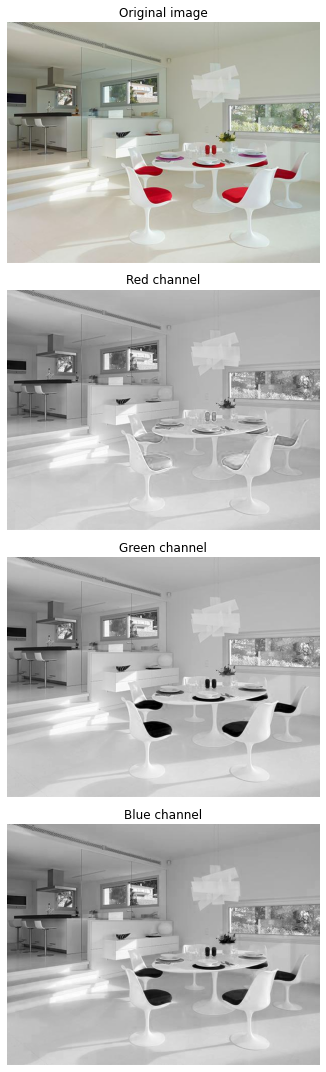

In [82]:
#Your solution
sillas = io.imread("images/images/sillas.jpg")

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))
ax = axes.ravel()
ax[0].imshow(sillas)
ax[0].set_title("Original image")
ax[0].axis('off')

ax[1].imshow(sillas[:,:,0], cmap='gray')
ax[1].set_title("Red channel")
ax[1].axis('off')

ax[2].imshow(sillas[:,:,1], cmap='gray')
ax[2].set_title("Green channel")
ax[2].axis('off')

ax[3].imshow(sillas[:,:,2], cmap='gray')
ax[3].set_title("Blue channel")
ax[3].axis('off')

plt.tight_layout()
plt.show()

d) Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/images_notebook/ex17c3.png">

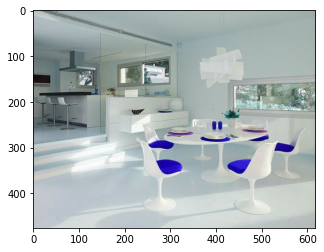

In [88]:
#Your solution
sillas_new = sillas.copy()

sillas_new[:,:,0] = sillas[:,:,2]
sillas_new[:,:,2] = sillas[:,:,0]

plt.imshow(sillas_new)
plt.show()

e) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

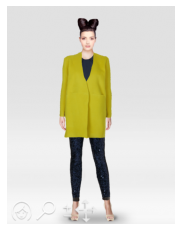

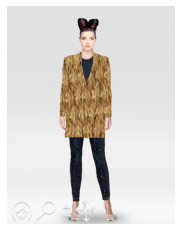

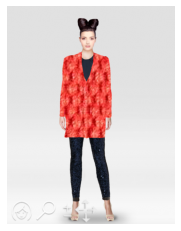

In [121]:
#Your solution
from skimage.transform import resize
from skimage.color import rgba2rgb


coat = io.imread("images/images/coat.png")
model = io.imread("images/images/model.png")
texture = io.imread("images/images/texture.png")
texture2 = io.imread("images/images/texture2.png")

coat = rgba2rgb(coat)
model = rgba2rgb(model)
mask = coat > 0
model[mask] = coat[mask]

plt.axis("off")
plt.imshow(model)
plt.show()

texture = resize(texture,model.shape)
model[mask] = texture[mask]

plt.axis("off")
plt.imshow(model)
plt.show()

texture2 = resize(texture2,model.shape)
model[mask] = texture2[mask]

plt.axis("off")
plt.imshow(model)
plt.show()

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): October 13, 11:00 p.m.** 